# 1.Preprocessing phase:

### Importing the dataset and showing the head of the dataset

In [7]:
import pandas as pd
df=pd.read_csv(r"C:\Users\LAOUEDJ Said\Desktop\AI\Exercice\titanic\titanic-passengers.csv", sep = ',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,Collander Mr. Erik Gustaf,male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,Moen Mr. Sigurd Hansen,male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,Jensen Mr. Hans Peder,male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,Palsson Mrs. Nils (Alma Cornelia Berglund),female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,Davidson Mr. Thornton,male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

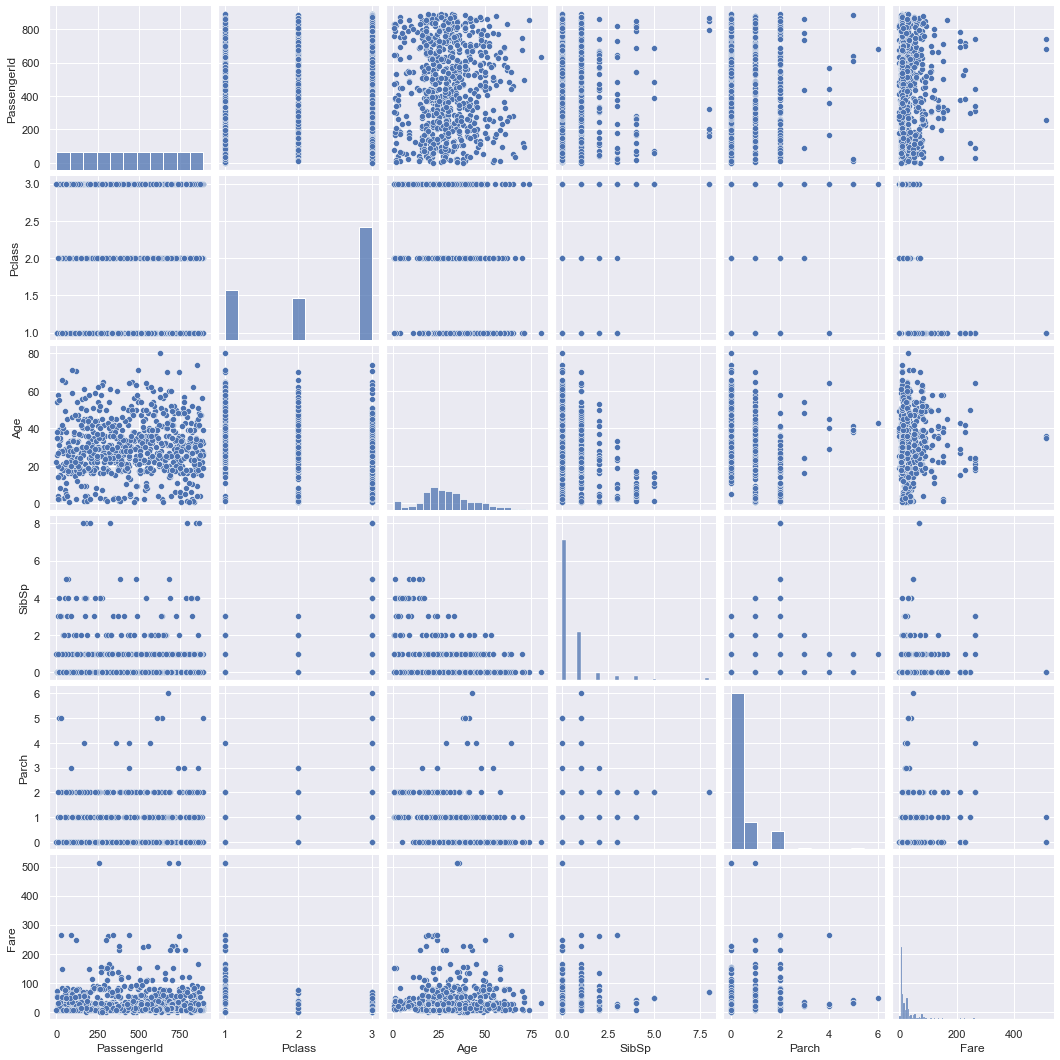

In [8]:
import pandas as pd
import seaborn as sns
sns.pairplot(df)

In [9]:
one_hot=pd.get_dummies(df['Sex'])
df=df.drop('Sex',axis=1)
df=df.join(one_hot)

import re
# Convert series pandas to list 
Title = df['Name']

Na=[]
Mylist=[]

# delete all words inside parenthese to avoide this cas when we extract Title ex:Miss. .... (Mrs .....)=> Miss. &  Mrs

for i in Title:
    Na = re.sub("\(.*?\)|\[.*?\]","", i)
    Mylist.append(Na)

# convert Mylist to pandas Series for using the commande findall 
Mylist = pd.Series(Mylist) 
type(Mylist)

Title = Mylist.str.findall('Capt[.]|Col[.]|Major[.]|Dr[.]|Rev[.]|Jonkheer[.]|Don[.]|Sir[.]|Lady[.]|the Countess[.]|Dona[.]|Mme[.]|Mlle[.]|Miss[.]|Ms[.]|Mr[.]|Mrs[.]|Master')  
type(Title)
# Convert pandas series to dataframe with name column'Title'
Title = Title.to_frame('Title')
# join to add to end of DataFrame
df = df.join(Title)
# Remove the square bracket for Converting all the data of Title into numerical values
df['Title'] = df['Title'].str.get(0)

# delete column 'Name'
del df['Name']

one_hot=pd.get_dummies(df['Title'])
df=df.drop('Title',axis=1)
df=df.join(one_hot)

#Logistic Regression Data Preparation
#preparing data Survived for logistic regression 

df["Survived"]=df["Survived"].map({"Yes": 1, "No": 0}) #convert Survived variable into numerical 
df.head() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Master,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the Countess.
0,343,0,2,28.0,0,0,248740,13.0000,NaN,S,...,0,0,0,0,1,0,0,0,0,0
1,76,0,3,25.0,0,0,348123,7.6500,F G73,S,...,0,0,0,0,1,0,0,0,0,0
2,641,0,3,20.0,0,0,350050,7.8542,NaN,S,...,0,0,0,0,1,0,0,0,0,0
3,568,0,3,29.0,0,4,349909,21.0750,NaN,S,...,0,0,0,0,0,1,0,0,0,0
4,672,0,1,31.0,1,0,F.C. 12750,52.0000,B71,S,...,0,0,0,0,1,0,0,0,0,0


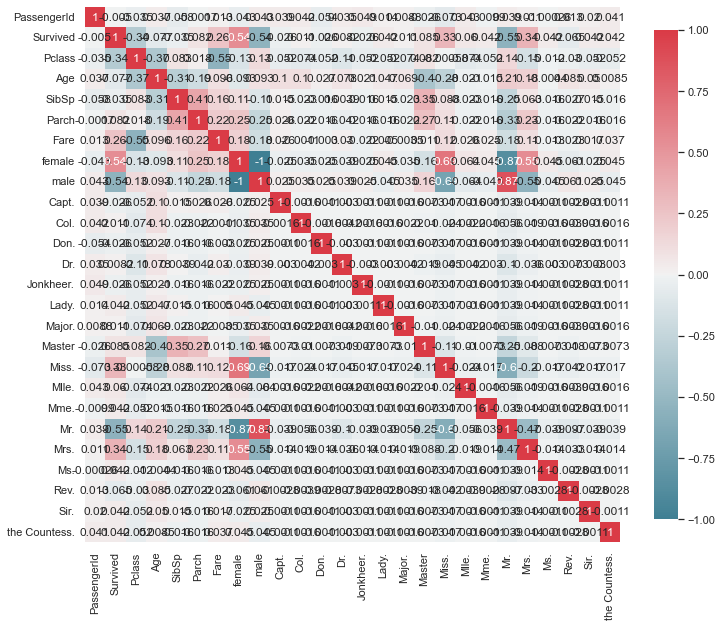

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set_theme()

def plot_correlation_map(df):
    corr=df.corr()
    s,ax=plt.subplots(figsize=(12,10))
    cmap=sns.diverging_palette(220,10,as_cmap=True)
    s=sns.heatmap(corr,cmap=cmap,square=True,cbar_kws={'shrink':.9},ax=ax,annot=True,annot_kws={'fontsize':12})
plot_correlation_map(df)    


 # Logistic Regression Code

In [10]:
#import relevant libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
#features extraction 

#extract x and y from our data 

x=df.drop(columns=['Survived','Age','Cabin','Embarked','Ticket']).values

y=df["Survived"].values




#x = df[['male','female']] 
#y = df['Survived'] 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.80,random_state=0) #splitting data with test size of 80 % 
logreg = LogisticRegression() #build our logistic model 
logreg.fit(x_train,y_train) #fitting training data 
y_pred = logreg.predict(x_test) #testing model’s performance 
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test))) 


Accuracy=0.80


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logistic Regression Distribution

<AxesSubplot:xlabel='male', ylabel='Survived'>

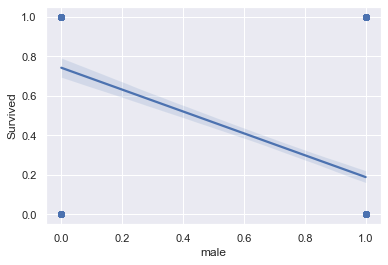

In [11]:
import seaborn as sns 
sns.regplot(x='male',y='Survived',data=df) 


<AxesSubplot:xlabel='female', ylabel='Survived'>

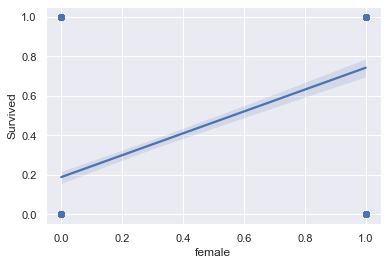

In [114]:
import seaborn as sns 
sns.regplot(x='female',y='Survived',data=df) 

<AxesSubplot:xlabel='Miss.', ylabel='Survived'>

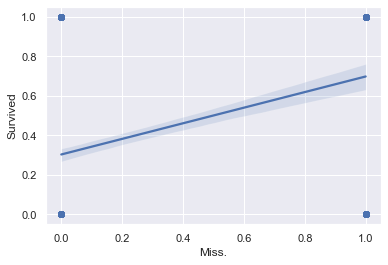

In [115]:
import seaborn as sns 
sns.regplot(x='Miss.',y='Survived',data=df) 

# Confusion Matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

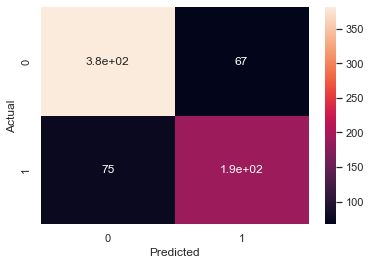

In [116]:
import pandas as pd
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']) 
sns.heatmap(confusion_matrix, annot=True) 


# Classification report

In [117]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred)) 


              precision    recall  f1-score   support

           0       0.84      0.85      0.84       449
           1       0.74      0.72      0.73       264

    accuracy                           0.80       713
   macro avg       0.79      0.78      0.79       713
weighted avg       0.80      0.80      0.80       713



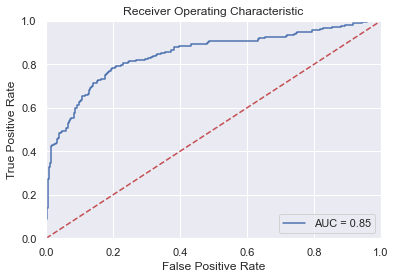

In [124]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC (Area under curve) = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

